In [1]:
from scipy import *
from scipy import optimize

###########################################################
######## neutrino mass splitting calculation ##############
###########################################################

#### delta m21^2=7.37e-5
#### |delta m^2| = 2.5e-3 (normal) 2.46e-3 (inverted)
d31N = 2.5e-3
d31I = 2.46e-3
d21 = 7.37e-5

m2fcn = lambda m1: sqrt(d21 + m1**2)
m3_NH = lambda m1: sqrt(d31N + 0.5*m2fcn(m1)**2 +0.5*m1**2)
m3_IH = lambda m1: sqrt(0.5*m2fcn(m1)**2 +0.5*m1**2 - d31I)
root_NH = lambda m1, M: M-(m1+m2fcn(m1)+m3_NH(m1))
root_IH = lambda m1, M: M-(m1+m2fcn(m1)+m3_IH(m1))

Mmin_NH = sqrt(d21)+sqrt(d31N+d21/2)
Mmin_IH = sqrt(d31I-0.5*d21) + sqrt(d31I+0.5*d21)
m1min_IH = sqrt(d31I-0.5*d21)

def neutrino_mass_calc (M, split=1):
    '''split = 1, 2, 3 for normal, inverted, degenerate
    '''    
    #print M
    if split == 1:
        m1=optimize.bisect(root_NH, 0, M, args=(M,))       
        m2=m2fcn(m1)
        m3=m3_NH(m1)
    elif split == 2:
        m1=optimize.bisect(root_IH, m1min_IH, M, args=(M,))
        m2=m2fcn(m1)
        m3=m3_IH(m1)
    elif split ==3:
        m1, m2, m3 = ones(3)*M/3.0
    return m1,m2,m3

In [19]:
def neutrino_mass_calc_bird (M):
    DD1 = 4 * M/3. - 2/3.*sqrt(M**2 + 3*d31N + 1.5*d21)
    #//Last term was neglected initially. This should be very well converged.
    DD = 4 * M/3. - 2/3.*sqrt(M**2 + 3*d31N + 1.5*d21 + 0.75*d21**2/DD1**2)
    m1 = M - DD
    m2 = 0.5*(DD + d21/DD)
    m3 = 0.5*(DD - d21/DD)
    return m1,m2,m3

def neutrino_mass_calc_bird_corrected (M):
    DD1 = 4 * M/3. - 2/3.*sqrt(M**2 + 3*d31N)
    #//Last term was neglected initially. This should be very well converged.
    DD = 4 * M/3. - 2/3.*sqrt(M**2 + 3*d31N + 0.75*d21**2/DD1**2)
    m1 = M - DD
    m2 = 0.5*(DD + d21/DD)
    m3 = 0.5*(DD - d21/DD)
    return m1,m2,m3

/Users/jia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in divide
/Users/jia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in divide


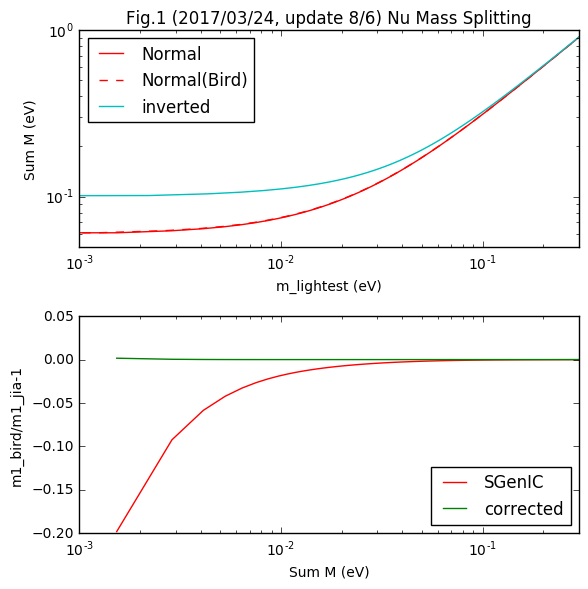

In [25]:
M_NH_arr = logspace(log10(Mmin_NH), 0, 101)
M_IH_arr = logspace(log10(Mmin_IH), 0, 101)

mlight_NH = array([neutrino_mass_calc (iM, split=1) for iM in M_NH_arr])
mlight_IH = array([neutrino_mass_calc (iM, split=2) for iM in M_IH_arr])
mlight_NH_bird = array([neutrino_mass_calc_bird (iM) for iM in M_NH_arr])
mlight_NH_bird_c = array([neutrino_mass_calc_bird_corrected (iM) for iM in M_NH_arr])

f=figure(figsize=(6,6))
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)
ax1.plot(amin(mlight_NH,axis=1), M_NH_arr,'r-',label='Normal')
ax1.plot(amin(mlight_NH_bird,axis=1), M_NH_arr,'r--',label='Normal(Bird)')
ax1.plot(amin(mlight_IH,axis=1), M_IH_arr,'c-',label='inverted')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Sum M (eV)')
ax1.set_ylim(5e-2, 1)
ax1.set_xlim(1e-3, 0.3)
ax1.legend(loc=0)
ax1.set_title('Fig.1 (2017/03/24, update 8/6) Nu Mass Splitting')
ax1.set_xlabel('m_lightest (eV)')

ax2.plot(amin(mlight_NH,axis=1),amin(mlight_NH_bird,axis=1)/amin(mlight_NH,axis=1)-1,'r',label='SGenIC')
ax2.plot(amin(mlight_NH,axis=1),amin(mlight_NH_bird_c,axis=1)/amin(mlight_NH,axis=1)-1,'g',label='corrected')
ax2.set_xlabel('Sum M (eV)')
ax2.set_ylabel('m1_bird/m1_jia-1')
ax2.set_xscale('log')
ax2.set_xlim(1e-3, 0.3)
ax2.legend(loc=0)
plt.tight_layout()
show() 

In [6]:
####################################
##### planck error ellipse #########
####################################
#### follows: http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/
#### covariance found at: https://wiki.cosmos.esa.int/planckpla/index.php/Cosmological_Parameters
covall1=loadtxt('../planck+lensing/planck_lowl/dist/base_planck_lowl_post_lensing.covmat')
covall2=loadtxt('../planck+wmap+lensing/planck_lowl_lowLike/dist/base_planck_lowl_lowLike_post_lensing.covmat')
covall3=loadtxt('../planck+wmap+highL+lensing/planck_lowl_lowLike_highL/dist/base_planck_lowl_lowLike_highL_post_lensing.covmat')

covmat1=array([covall1[i,j] for i in (1,5) for j in (1,5)]).reshape(2,2)
covmat2=array([covall2[i,j] for i in (1,5) for j in (1,5)]).reshape(2,2)
covmat3=array([covall3[i,j] for i in (1,5) for j in (1,5)]).reshape(2,2)

covmat=covmat1
#eigvals, eigvec = linalg.eig(covmat)
#rmajor, rminor = sqrt(2*5.991*eigvals)
#alpha = arctan (eigvec[argmax(eigvals)][1]/eigvec[argmax(eigvals)][0])
#print rmajor, rminor, alpha


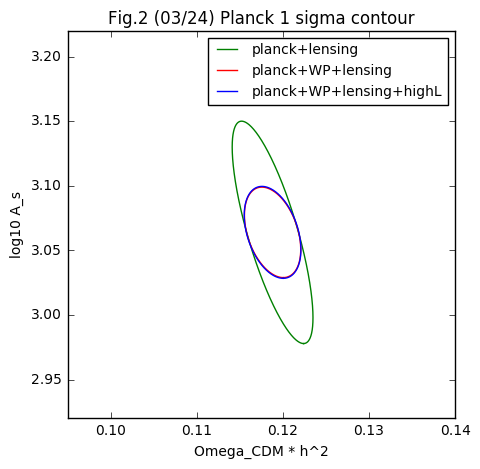

In [7]:
from plot_ellipse import plot_ellipse
f=figure(figsize=(5,5))
ax=f.add_subplot(111)
plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat1,mass_level=0.68,ax=ax, plot_kwargs={'color':'g','label':'planck+lensing'})
plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat2,mass_level=0.68,ax=ax, plot_kwargs={'color':'r','label':'planck+WP+lensing'})
plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat3,mass_level=0.68,ax=ax, plot_kwargs={'color':'b','label':'planck+WP+lensing+highL'})
#plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat1,mass_level=0.95,ax=ax, plot_kwargs={'color':'g'})
#plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat1,mass_level=0.99,ax=ax, plot_kwargs={'color':'g'})

xlabel('Omega_CDM * h^2')
ylabel('log10 A_s')
xlim(0.095, 0.14)
ylim(2.92, 3.22)
legend(loc=0, fontsize=10)
ax.set_title('Fig.2 (03/24) Planck 1 sigma contour')
show()


In [8]:
###########################################
####### cosmological model points #########
###########################################

##### follows: http://www.columbia.edu/~ap3020/LensTools/html/examples/design.html
##### try: https://pythonhosted.org/pyDOE/randomized.html
from pyDOE import *
from scipy.stats.distributions import norm

seed(10027)
#lhd_grid_3d = lhs(3, samples=100, criterion='m', iterations=10000)
#lhd_gridcm_3d = lhs(3, samples=100, criterion='cm', iterations=10000)
#savetxt('lhd_grid_3d.txt', lhd_grid_3d)
#savetxt('lhd_gridcm_3d.txt', lhd_gridcm_3d)
lhd_grid_3d=loadtxt('lhd_grid_3d.txt')
lhd_gridcm_3d=loadtxt('lhd_gridcm_3d.txt')
#lhd_gridcm_3d=loadtxt('gridpoints.txt')

lhd_grid = lhd_grid_3d[:,:-1]
lhd_gridcm = lhd_gridcm_3d[:,:-1]


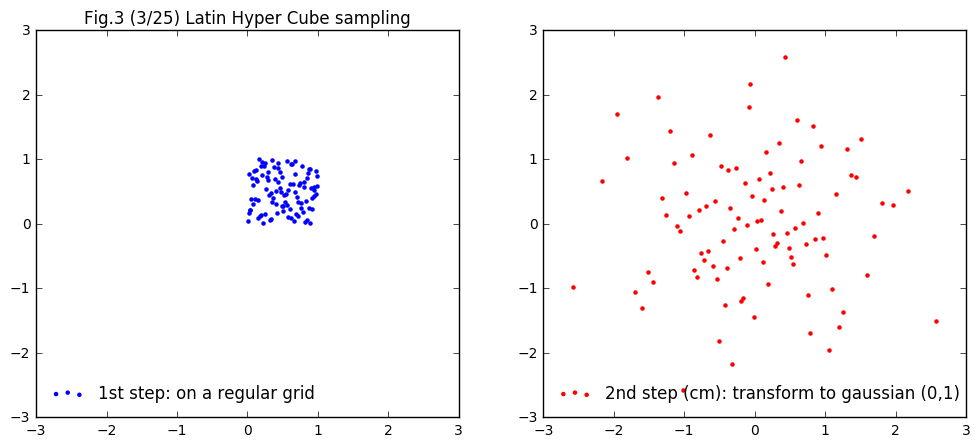

In [9]:
lhd_gaus = norm(loc=0, scale=1).ppf(lhd_grid)
lhd_gaus_cm = norm(loc=0, scale=1).ppf(lhd_gridcm)
f=figure(figsize=(12,5))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)
ax1.scatter(lhd_grid.T[0], lhd_grid.T[1], c='b',edgecolors='face',s=5,label='1st step: on a regular grid')
#ax1.scatter(lhd_gaus.T[0], lhd_gaus.T[1], c='r',edgecolors='face',s=5,label='2nd step: transform to gaussian (0,1)')

ax2.scatter(lhd_gaus_cm.T[0], lhd_gaus_cm.T[1], c='r',edgecolors='face',s=5,label='2nd step (cm): transform to gaussian (0,1)')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)
ax1.legend(frameon=0,loc=3)
ax2.legend(frameon=0,loc=3)

ax1.set_title('Fig.3 (3/25) Latin Hyper Cube sampling')
show()

In [10]:
from scipy.stats import chi2
from scipy import stats
data=lhd_gaus_cm.copy()
x_cent=0.1188
y_cent=3.064
mass_level=0.95

eig_vec,eig_val,u = np.linalg.svd(covmat)
# Make sure 0th eigenvector has positive x-coordinate
if eig_vec[0][0] < 0:
    eig_vec[0] *= -1
semimaj = np.sqrt(eig_val[0])
semimin = np.sqrt(eig_val[1])

distances = np.linspace(0,20,20001)
chi2_cdf = chi2.cdf(distances,df=2)
multiplier = np.sqrt(distances[np.where(np.abs(chi2_cdf-mass_level)==np.abs(chi2_cdf-mass_level).min())[0][0]])
semimaj *= multiplier
semimin *= multiplier
phi = np.arccos(np.dot(eig_vec[0],np.array([1,0])))
if eig_vec[0][1] < 0 and phi > 0:
    phi *= -1

S = np.array([[semimaj,0],[0,semimin]])
R = np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
T = np.dot(R,S)
data_lhc = np.dot(T,data.T)
data_lhc[0] += x_cent
data_lhc[1] += y_cent

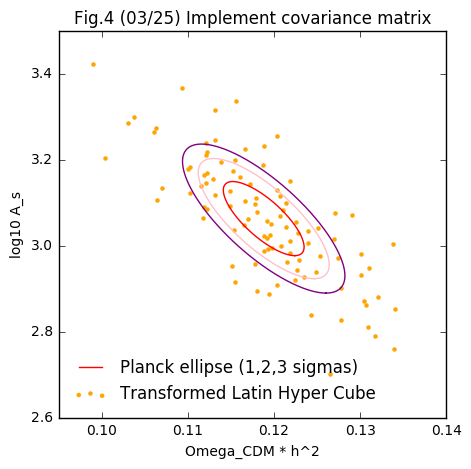

In [11]:
f=figure(figsize=(5,5))
ax=f.add_subplot(111)
plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat,mass_level=0.68,ax=ax, plot_kwargs={'color':'r','label':'Planck ellipse (1,2,3 sigmas)'})
plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat,mass_level=0.95,ax=ax, plot_kwargs={'color':'pink'})
plot_ellipse(x_cent=0.1188,y_cent=3.064,cov=covmat,mass_level=0.99,ax=ax, plot_kwargs={'color':'purple'})
ax.scatter(data_lhc[0],data_lhc[1],c='orange',edgecolors='face',s=5,label='Transformed Latin Hyper Cube')
ax.set_xlabel('Omega_CDM * h^2')
ax.set_ylabel('log10 A_s')
#ax.set_xlim(0.095, 0.14)
#ax.set_ylim(2.92, 3.22)
legend(frameon=0,loc=3)
ax.set_title('Fig.4 (03/25) Implement covariance matrix')
show()

In [12]:
#from IPython.display import Image
#Image("planck2015.png")

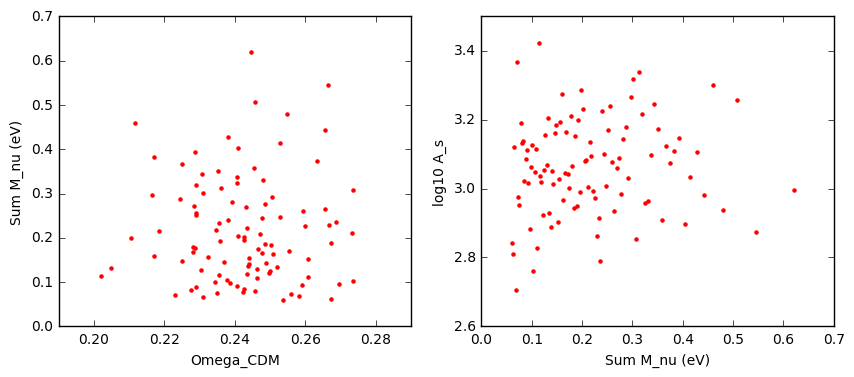

In [16]:
#nu_rand = lhd_grid_3d[:,-1] * (0.5-Mmin_NH) + Mmin_NH
#nu_rand_cm = lhd_gridcm_3d[:,-1]  * (0.5-Mmin_NH) + Mmin_NH
nu_rand_cm = stats.distributions.halfnorm(loc=0, scale=0.2).ppf(lhd_gridcm_3d[:,-1])+Mmin_NH
h=0.7
f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)
ax1.scatter(data_lhc[0] / h**2,nu_rand_cm,c='r',edgecolors='face',s=5)
ax2.scatter(nu_rand_cm,data_lhc[1],c='r',edgecolors='face',s=5)
ax1.set_xlabel('Omega_CDM')
ax2.set_ylabel('log10 A_s')
#ax1.set_xlim(0.095, 0.14)
#ax2.set_ylim(2.92, 3.22)
ax1.set_ylabel('Sum M_nu (eV)')
ax2.set_xlabel('Sum M_nu (eV)')
ax1.set_title('Fig.5 (03/25) Model points projections')
show()

In [11]:
#savetxt('models.txt',array([data_lhc[0],data_lhc[1],nu_rand_cm]).T)

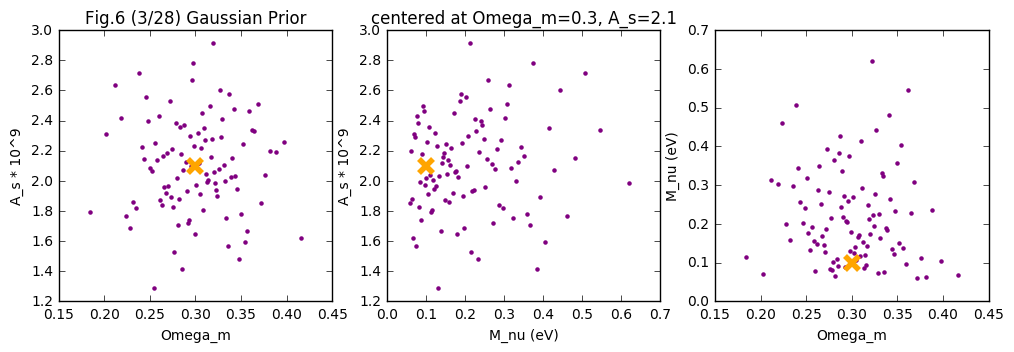

In [32]:
fidu_om, fidu_As = 0.3, 2.1 # Omega_m, A_s*1e9
#lhd_gaus_cm = norm(loc=0, scale=1).ppf(lhd_gridcm)
lhd_gaus_cm_tramsformed = zeros(shape=lhd_gaus_cm.shape)
lhd_gaus_cm_tramsformed.T[0] = lhd_gaus_cm.T[0]*fidu_om*0.15 + fidu_om
lhd_gaus_cm_tramsformed.T[1] = lhd_gaus_cm.T[1]*fidu_As*0.15 + fidu_As


f=figure(figsize=(12,3.5))
ax1=f.add_subplot(131)
ax2=f.add_subplot(132)
ax3=f.add_subplot(133)
ax1.plot(fidu_om, fidu_As,'x',c='orange',ms=10,mew=4)
ax1.scatter(lhd_gaus_cm_tramsformed.T[0], lhd_gaus_cm_tramsformed.T[1], c='purple',edgecolors='face',s=5)
ax2.plot(0.1, fidu_As,'x',c='orange',ms=10,mew=4)

ax2.scatter(nu_rand_cm, lhd_gaus_cm_tramsformed.T[1], c='purple',edgecolors='face',s=5)
ax3.plot(fidu_om,0.1,'x',c='orange',ms=10,mew=4)
ax3.scatter(lhd_gaus_cm_tramsformed.T[0],nu_rand_cm,  c='purple',edgecolors='face',s=5)
ax1.set_xlabel('Omega_m')
ax1.set_ylabel('A_s * 10^9')
ax2.set_xlabel('M_nu (eV)')
ax2.set_ylabel('A_s * 10^9')
ax3.set_xlabel('Omega_m')
ax3.set_ylabel('M_nu (eV)')

ax1.set_title('Fig.6 (3/28) Gaussian Prior')
ax2.set_title('centered at Omega_m=0.3, A_s=2.1')

show()

In [14]:
params = array([nu_rand_cm, lhd_gaus_cm_tramsformed.T[0], lhd_gaus_cm_tramsformed.T[1]]).T
params = append(params, [[0.1, 0.3, 2.1],[0.0, 0.3, 2.1]],axis=0) 
params = delete(params, where(nu_rand_cm==amin(nu_rand_cm))[0],axis=0)
savetxt('params.txt',params)

In [4]:
######## check the comoving distances between massive and massless neutrinos
import sys
from scipy import *
sys.modules["mpi4py"] = None
sys.modules["matplotlib"] = None
import lenstools
from lenstools.pipeline.simulation import LensToolsCosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

M_nu=array([ 0.02175,  0.02338,  0.05486])
omega_m = 0.3

cosmo_flat_massless=FlatLambdaCDM(H0=70, Om0=0.3, m_nu=zeros(3)*u.eV, Ob0=None)
cosmo_flat=FlatLambdaCDM(H0=70, Om0=0.3, m_nu= M_nu*u.eV, Ob0=None)
Om_nonu = 0.3 - cosmo_flat.Onu0
Ode = 1-omega_m-cosmo_flat.Ogamma0
cosmo_flat=FlatLambdaCDM(H0=70, Om0=Om_nonu, m_nu= M_nu*u.eV, Ob0=None)

ztests = linspace(0.1, 50, 11)
DC_massive = cosmo_flat.comoving_distance(ztests)
DC_massless = cosmo_flat_massless.comoving_distance(ztests)

print DC_massive/DC_massless - 1
## note: results are consistent with http://www.astro.ucla.edu/~wright/ACC.html
## there omega_m including neutrinos

# below tested consistent with cosmo_flat on perseus
#cosmo_lt=LensToolsCosmology(H0=70, Om0=Om_nonu, Ode0=Ode, m_nu = M_nu *u.eV, Ob0=None)
#cosmo_lt_massless=LensToolsCosmology(H0=70, Om0=0.3, Ode0=0.7, m_nu=array([ 0.0,  0.0,  0.0]) *u.eV, Ob0=None)

[  3.54684653e-06   1.18647605e-04   1.70635040e-04   2.07178238e-04
   2.35865771e-04   2.59547641e-04   2.79687066e-04   2.97161769e-04
   3.12549865e-04   3.26256570e-04   3.38578768e-04]
